## 1. Data Loading and Cleaning

In [1]:
## Using Pandas to load the dataset into a DataFrame for manipulation.
import os
import pandas as pd

# read file path
r"C:\Users\Lenovo\Documents\datahackerman_c3rz\projectA\appliance_energy_prediction.csv"

'C:\\Users\\Lenovo\\Documents\\datahackerman_c3rz\\projectA\\appliance_energy_prediction.csv'

In [2]:
# Load CSV file
import pandas as pd

# Read the data into a DataFrame
appliance_energy_prediction_data = pd.read_csv(r"C:\Users\Lenovo\Documents\datahackerman_c3rz\projectA\appliance_energy_prediction.csv")
df = appliance_energy_prediction_data
df.head(10)
df.info()
df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [4]:
## Identify Missing Values: Check for null or missing values.
print(df.isnull().sum())

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


In [5]:
# Drop rows with missing values
df = df.dropna()
# Fill missing values with a specific value
df = df.fillna(0)


In [6]:
df.columns = df.columns.str.strip()

In [7]:
# Format date column
df['date'] = pd.to_datetime(df['date'])

# Create 'consumption_date' column 
df['consumption_date'] = df['date'].dt.date

# Create 'hour' column 
df['hour'] = df['date'].dt.hour


In [8]:
# Get list of current columns
cols = df.columns.tolist()

# Remove the two new columns if already present
cols.remove('date')
cols.remove('consumption_date')
cols.remove('hour')

# Insert 'day_date' at position 1 (second column)
cols.insert(0, 'consumption_date')

# Insert 'hour' at position 2 (third column)
cols.insert(1, 'hour')

# Reorder the DataFrame
df = df[cols]
df.head()

,consumption_date,hour,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11,17,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11,17,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11,17,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11,17,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11,17,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [9]:

# Adjust float numbers in columns 3 to 28 to two decimal places
df.iloc[:, 3:28] = df.iloc[:, 3:28].round(2)

df.head(10)

,consumption_date,hour,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11,17,60,30,19.89,47.60,19.20,44.79,19.79,44.73,...,17.03,45.53,6.60,733.50,92.00,7.00,63.00,5.30,13.275433,13.275433
1,2016-01-11,17,60,30,19.89,46.69,19.20,44.72,19.79,44.79,...,17.07,45.56,6.48,733.60,92.00,6.67,59.17,5.20,18.606195,18.606195
2,2016-01-11,17,50,30,19.89,46.30,19.20,44.63,19.79,44.93,...,17.00,45.50,6.37,733.70,92.00,6.33,55.33,5.10,28.642668,28.642668
3,2016-01-11,17,50,40,19.89,46.07,19.20,44.59,19.79,45.00,...,17.00,45.40,6.25,733.80,92.00,6.00,51.50,5.00,45.410389,45.410389
4,2016-01-11,17,60,40,19.89,46.33,19.20,44.53,19.79,45.00,...,17.00,45.40,6.13,733.90,92.00,5.67,47.67,4.90,10.084097,10.084097
5,2016-01-11,17,50,40,19.89,46.03,19.20,44.50,19.79,44.93,...,17.00,45.29,6.02,734.00,92.00,5.33,43.83,4.80,44.919484,44.919484
6,2016-01-11,18,60,50,19.89,45.77,19.20,44.50,19.79,44.90,...,17.00,45.29,5.90,734.10,92.00,5.00,40.00,4.70,47.233763,47.233763
7,2016-01-11,18,60,50,19.86,45.56,19.20,44.50,19.73,44.90,...,17.00,45.29,5.92,734.17,91.83,5.17,40.00,4.68,33.039890,33.039890
8,2016-01-11,18,60,40,19.79,45.60,19.20,44.43,19.73,44.79,...,17.00,45.29,5.93,734.23,91.67,5.33,40.00,4.67,31.455702,31.455702
9,2016-01-11,18,70,40,19.86,46.09,19.23,44.40,19.79,44.86,...,17.00,45.29,5.95,734.30,91.50,5.50,40.00,4.65,3.089314,3.089314


## 2. Exploratory Data Analysis (EDA)

To put all the computed summary statistics (mean, median, min, max, and std) into a table in pandas, we combined them into a single DataFrame using pd.DataFrame

In [10]:
summary_statistics = pd.DataFrame({
    'mean': df.mean(numeric_only=True),
    'median': df.median(numeric_only=True),
    'min': df.min(numeric_only=True),
    'max': df.max(numeric_only=True),
    'std': df.std(numeric_only=True)
})
print(summary_statistics)

                   mean      median         min         max         std
hour          11.502002   12.000000    0.000000    23.00000    6.921953
Appliances    97.694958   60.000000   10.000000  1080.00000  102.524891
lights         3.801875    0.000000    0.000000    70.00000    7.935988
T1            21.686562   21.600000   16.790000    26.26000    1.606068
RH_1          40.259721   39.660000   27.020000    63.36000    3.979259
T2            20.341193   20.000000   16.100000    29.86000    2.192998
RH_2          40.420409   40.500000   20.460000    56.03000    4.069791
T3            22.267591   22.100000   17.200000    29.24000    2.006122
RH_3          39.242463   38.530000   28.770000    50.16000    3.254567
T4            20.855335   20.670000   15.100000    26.20000    2.042882
RH_4          39.026890   38.400000   27.660000    51.09000    4.341312
T5            19.592098   19.390000   15.330000    25.80000    1.844620
RH_5          50.949262   49.090000   29.820000    96.32000    9

In [11]:
# energy usage by day
daily_total = df.groupby('consumption_date')['Appliances'].sum()

# sort and show top 10
top_20_days = daily_total.sort_values(ascending=False).head(10)

top_20_days.reset_index()

,consumption_date,Appliances
0,2016-04-04,27150
1,2016-03-25,25980
2,2016-04-22,24570
3,2016-05-13,24280
4,2016-03-14,23620
5,2016-05-21,23280
6,2016-03-16,22810
7,2016-02-29,22630
8,2016-02-01,22450
9,2016-04-05,22300


## Consumption per hour

In [12]:
# Group by hour and sum energy consumption
hourly_consumption = df.groupby('hour')['Appliances'].sum()

# Convert the hour to string format for clarity
hourly_consumption.index = hourly_consumption.index.map(lambda x: f"{x:02d}:00 - {x:02d}:59")

# Convert the result to a DataFrame for display
hourly_consumption_df = hourly_consumption.reset_index()
hourly_consumption_df.columns = ['Hour Range', 'Total Energy (Wh)']
hourly_consumption.reset_index()

,hour,Appliances
0,00:00 - 00:59,43390
1,01:00 - 01:59,42190
2,02:00 - 02:59,40340
3,03:00 - 03:59,39650
4,04:00 - 04:59,40570
5,05:00 - 05:59,43350
6,06:00 - 06:59,47440
7,07:00 - 07:59,64650
8,08:00 - 08:59,87250
9,09:00 - 09:59,92710


### Average appliance usage per day

In [13]:
import pandas as pd
from collections import defaultdict

# Convert column to datetime
df['consumption_date'] = pd.to_datetime(df['consumption_date'])
df['day_of_week'] = df['consumption_date'].dt.day_name()

# Group appliance usage by day
usage_by_day = defaultdict(list)
for day, value in zip(df['day_of_week'], df['Appliances']):
    usage_by_day[day].append(value)

# Calculate average usage per day
average_usage_by_day = {day: sum(vals) / len(vals) for day, vals in usage_by_day.items()}

# Convert to DataFrame
avg_df = pd.DataFrame(list(average_usage_by_day.items()), columns=['Day', 'Average Energy (Wh)'])

# Round to two decimal places
avg_df['Average Energy (Wh)'] = avg_df['Average Energy (Wh)'].round(2)

# Display result
avg_df.reset_index(drop=True, inplace=True)
avg_df



,Day,Average Energy (Wh)
0,Monday,111.45
1,Tuesday,87.12
2,Wednesday,89.93
3,Thursday,90.43
4,Friday,104.62
5,Saturday,106.25
6,Sunday,94.92


## Visualization with Matplotlib

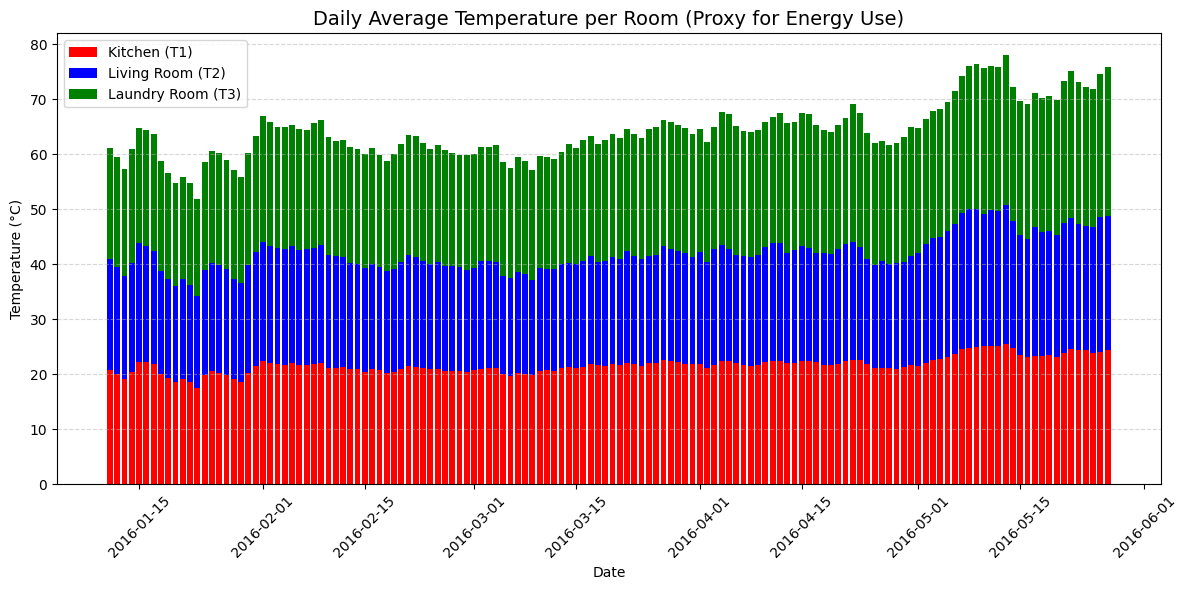

In [14]:
import matplotlib.pyplot as plt

# Selecting relevant room temperature columns
room_temps = df[['consumption_date', 'T1', 'T2', 'T3']].copy()

# Group by date and calculate mean temperature per room per day
daily_room_avg = room_temps.groupby('consumption_date').mean()

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(daily_room_avg.index, daily_room_avg['T1'], label='Kitchen (T1)', color='red')
plt.bar(daily_room_avg.index, daily_room_avg['T2'], bottom=daily_room_avg['T1'], label='Living Room (T2)', color='blue')
plt.bar(daily_room_avg.index, daily_room_avg['T3'],
        bottom=daily_room_avg['T1'] + daily_room_avg['T2'],
        label='Laundry Room (T3)', color='green')

# Customizing plot
plt.title('Daily Average Temperature per Room (Proxy for Energy Use)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Showing plot
plt.show()


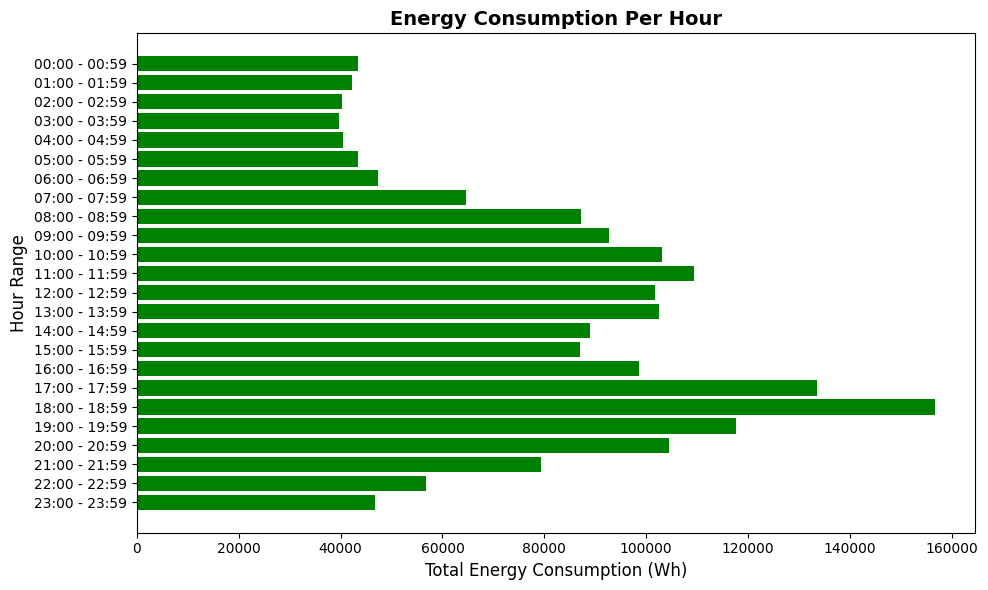

In [15]:
import matplotlib.pyplot as plt

# Plotting the comparison as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(hourly_consumption_df['Hour Range'], hourly_consumption_df['Total Energy (Wh)'], color='green')

# Add title and labels
plt.title('Energy Consumption Per Hour', fontsize=14, fontweight='bold')
plt.xlabel('Total Energy Consumption (Wh)', fontsize=12)
plt.ylabel('Hour Range', fontsize=12)
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()
plt.show()


### Scatter plot of average usage by day

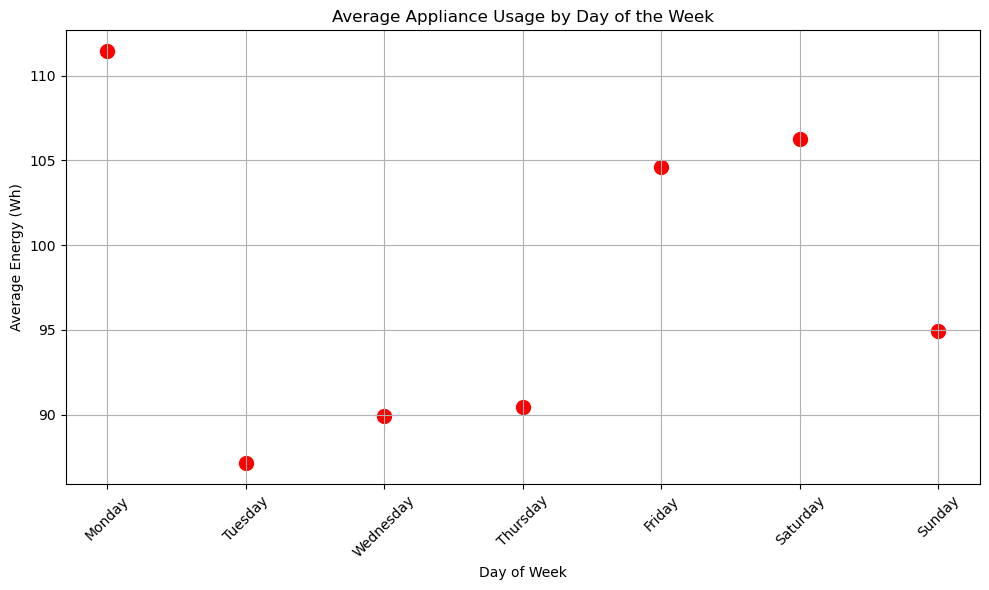

In [261]:
days = list(average_usage_by_day.keys())
averages = list(average_usage_by_day.values())
positions = range(len(days))

plt.figure(figsize=(10, 6))
plt.scatter(positions, averages, color='red', s=100)

plt.xticks(positions, days, rotation=45)
plt.title('Average Appliance Usage by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Energy (Wh)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Appliance Energy Prediction Dataset Background

The Appliance Energy Prediction Dataset is an open dataset which contains measurements related to energy consumption in a single residential building. It includes variables such as appliance usage, lights, indoor and outdoor temperatures, humidity levels, and weather conditions, sampled at 10-minute intervals.

#### Key column used in this project:
•	Appliances: Energy consumed by appliances (Wh)
•	date: Timestamp of each measurement
•	T1-T3: Kitchen, Laundry and living room
Project Platform:
•	Jupyter notebook
Imports:
•	Pandas, Os, Matplotlib, Numpy
________________________________________
### Data Cleaning Process
1.	Removed whitespaces: Removed whitespace, to ensure consistency, avoid errors, improve data processing, and enhance accuracy. 
2.	Datetime Conversion: The date column was converted to proper datetime format and split into separate columns
3.	Date Feature Extraction: New columns- consumption_date, day_of_week, hour was derived from the timestamp to analyze monthly, weekly and hourly patterns.
4.	Removed Null Data: Removed null data to ensure accuracy, enhance visualization, and prevent skewed results.
5.	Rounding Numbers: Rounded floats to two decimal places to improve readability, standardize data, and focus on relevant details________________________________________
Exploratory Data Analysis (EDA)
#### Key Aggregations:
•	Average Appliance Usage by Day: Grouped all appliance readings by day of the week and computed the average usage using defaultdict.
•	Frequency of Rounded Appliance Usage Values: (Optional) Used Counter to analyze how often certain ranges of appliance consumption occurred.
#### Visualizations:
•	Horizontal Bar Plot: Displayed appliance consumption per hour
•	Scatter Plot: Displayed average energy consumption per day of the week to identify usage patterns visually.
•	Stacked Bar: Showed indoor temperatures (T1–T9) vs energy consumption to see if heating or cooling affects energy usage.
________________________________________

#### Key Insights
1.	Weekday Patterns:
o	Higher energy usage was generally observed during weekdays compared to weekends.
o	Monday and Tuesday often showed peak average usage, indicating typical weekday routines.
2.	Weekend Efficiency:
o	Appliance usage dipped slightly on Saturdays and Sundays, possibly due to less structured routines or fewer occupied hours.
3.	Use of Python collections:
o	defaultdict enabled efficient grouping without pre-initializing keys.
o	Results were quickly converted to a DataFrame for presentation and plotting.
4.	#### Tempersture and Consumption
o	Temperature trends vary across rooms, reflecting different usage patterns.
o	Weekly and daily fluctuations highlight peak activity periods. Total stacked bar height indicates overall indoor thermal load (proxy for HVAC demand).
o	Helps identify where and when to focus energy-saving efforts.
________________________________________
### Interesting Findings
•	The dataset reflects real-life energy behavior where workday schedules lead to higher appliance usage, which may be due to more appliance usage.
•	Aggregating and visualizing by day of week gives actionable insight into routine energy habits, which is useful for home automation or energy-saving recommendations.
•	Kitchen (T1) often shows the highest activity, suggesting it’s a major energy user.

